In [163]:
# Part I : Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Loading the Dataset

In [137]:
df=pd.read_csv("/Cancer_Data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Exploratory Data Analysis (EDA)

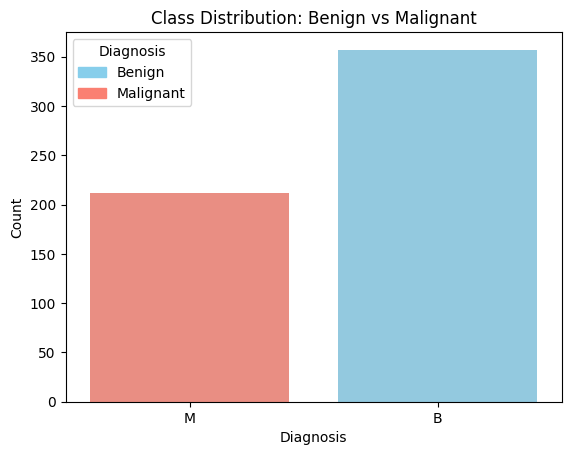

In [15]:

color_palette = {'B': 'skyblue', 'M': 'salmon'} #B: Beningn (Non-cancerous), M : Malignant(Cancerous)

# Plot class distribution with custom colors
sns.countplot(x='diagnosis', hue='diagnosis', data=df, palette=color_palette, legend=False)
plt.title('Class Distribution: Benign vs Malignant')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

legend_labels = {'B': 'Benign', 'M': 'Malignant'}
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color_palette[key]) for key in legend_labels],
           labels=[legend_labels[key] for key in legend_labels], title="Diagnosis")
plt.show()


<Axes: >

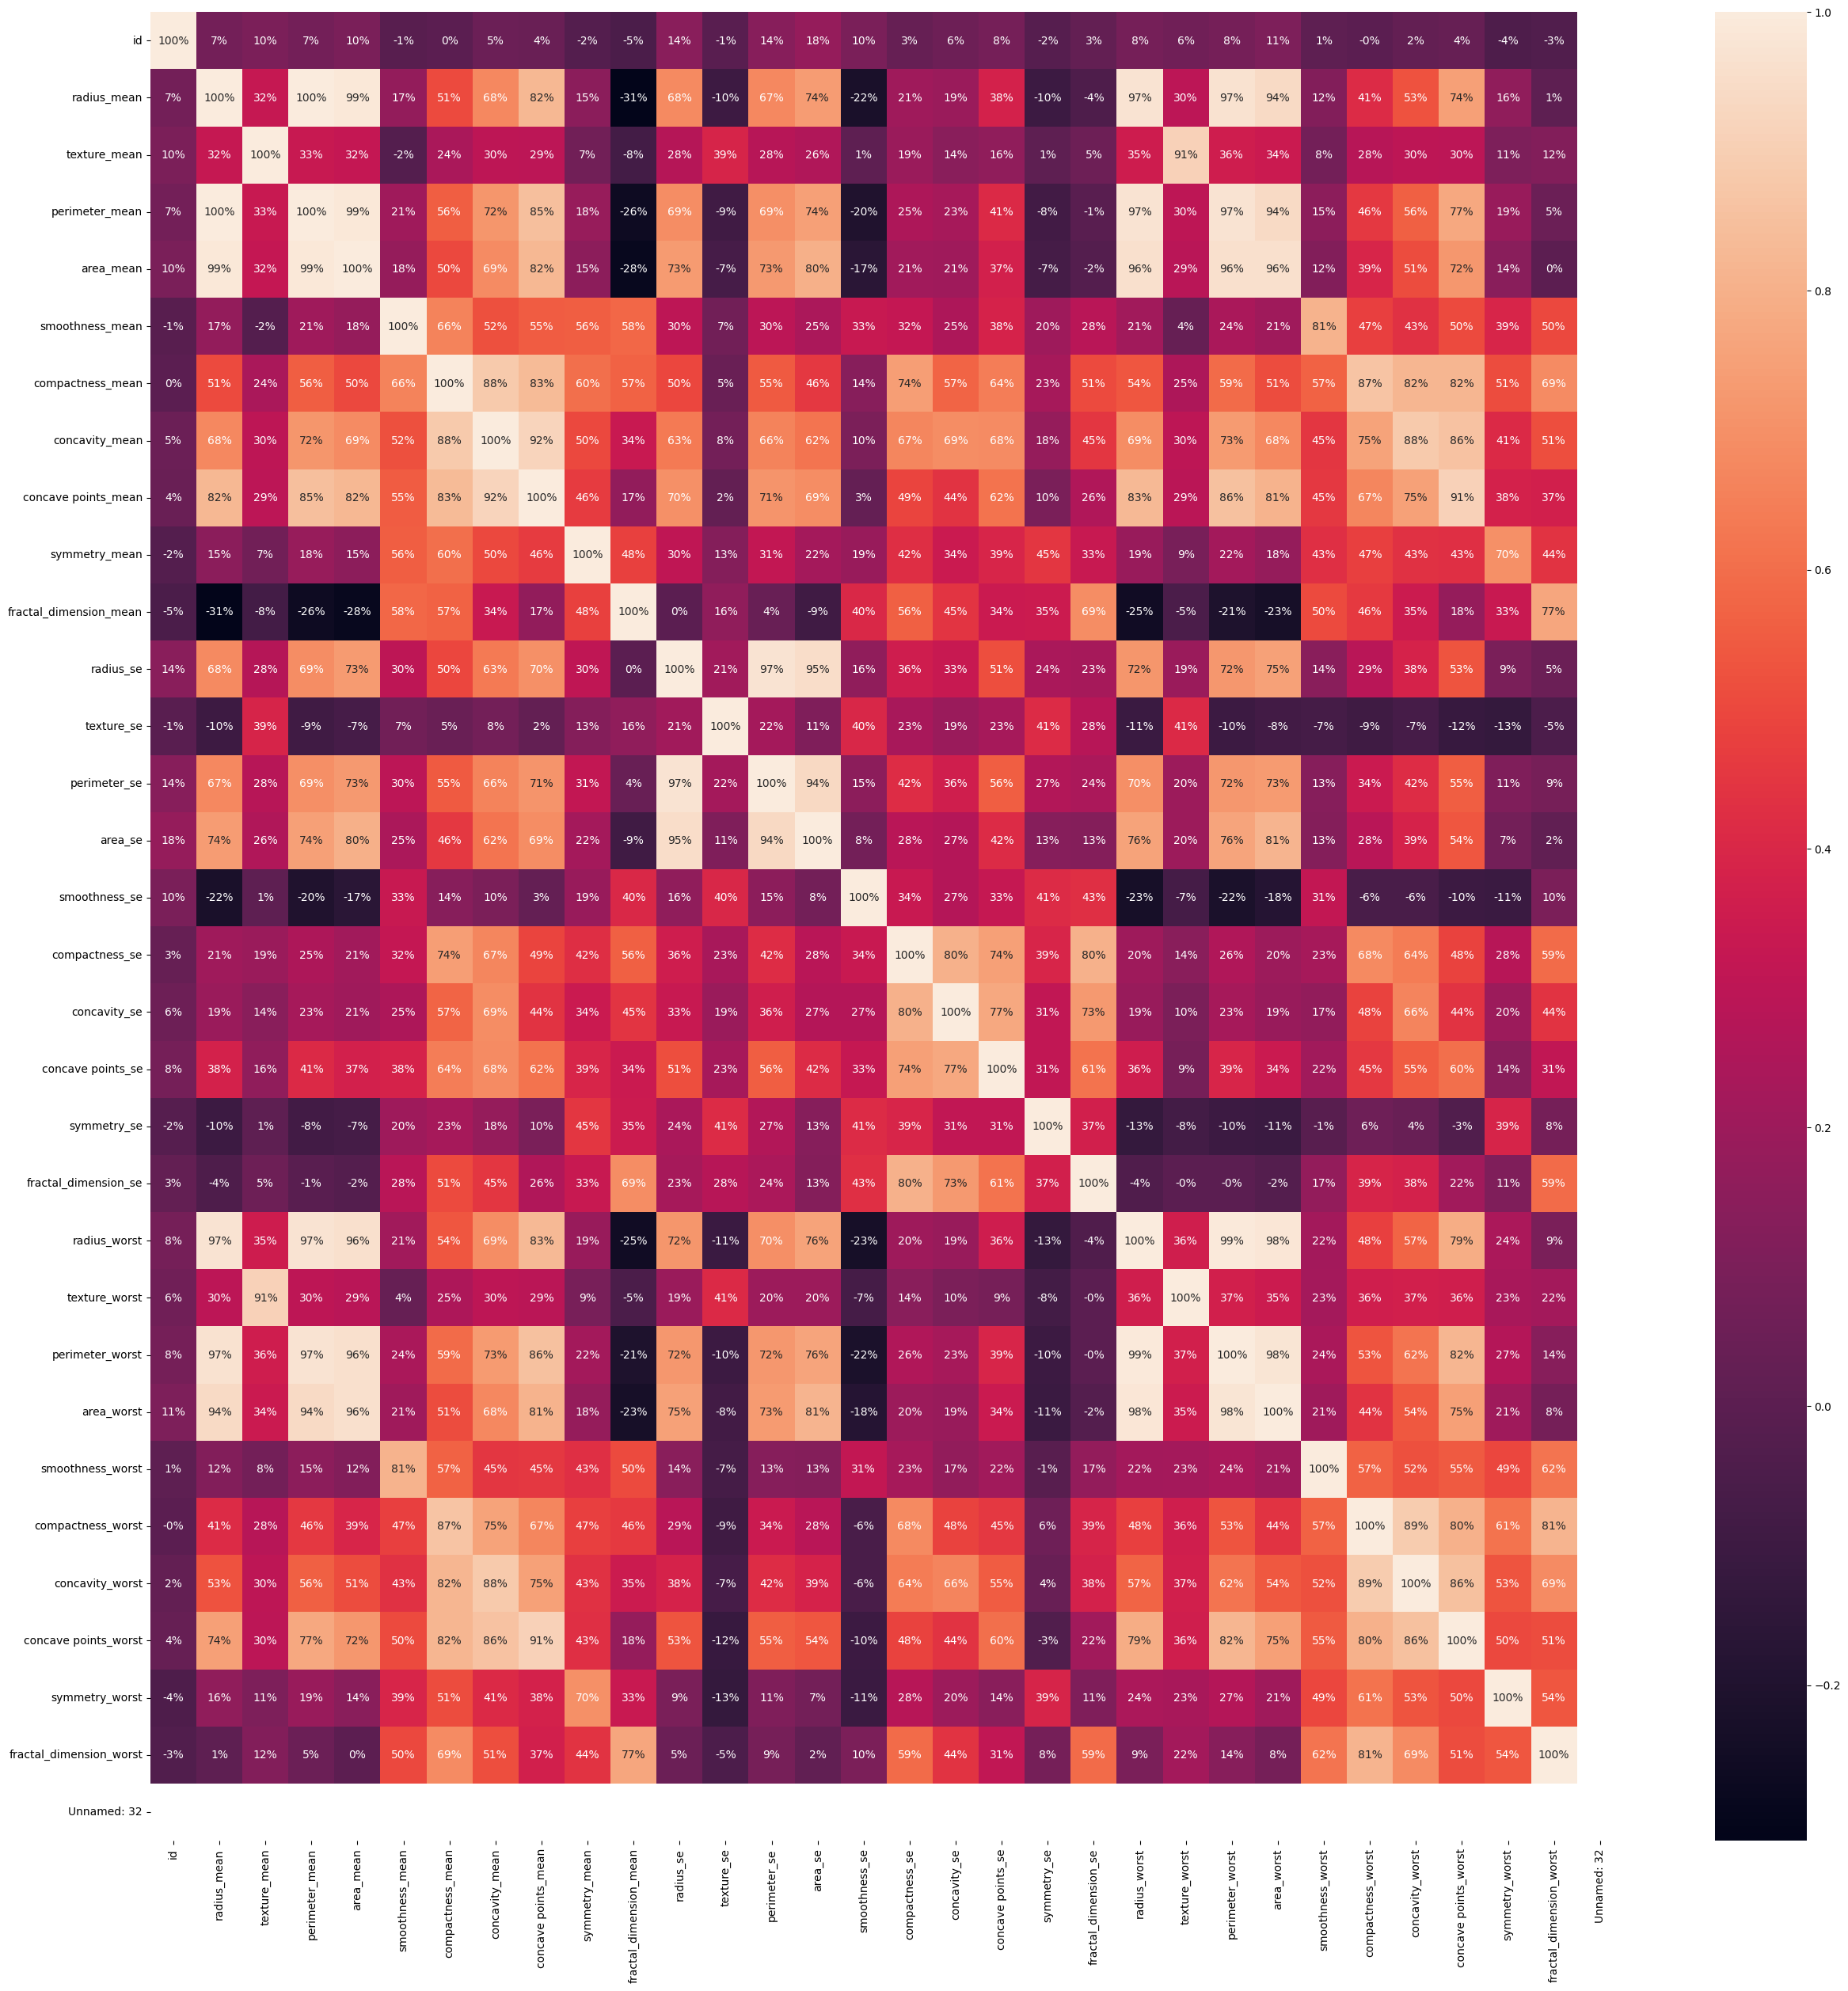

In [30]:
#Correlation HeatMap
#Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot= True, fmt=".0%")




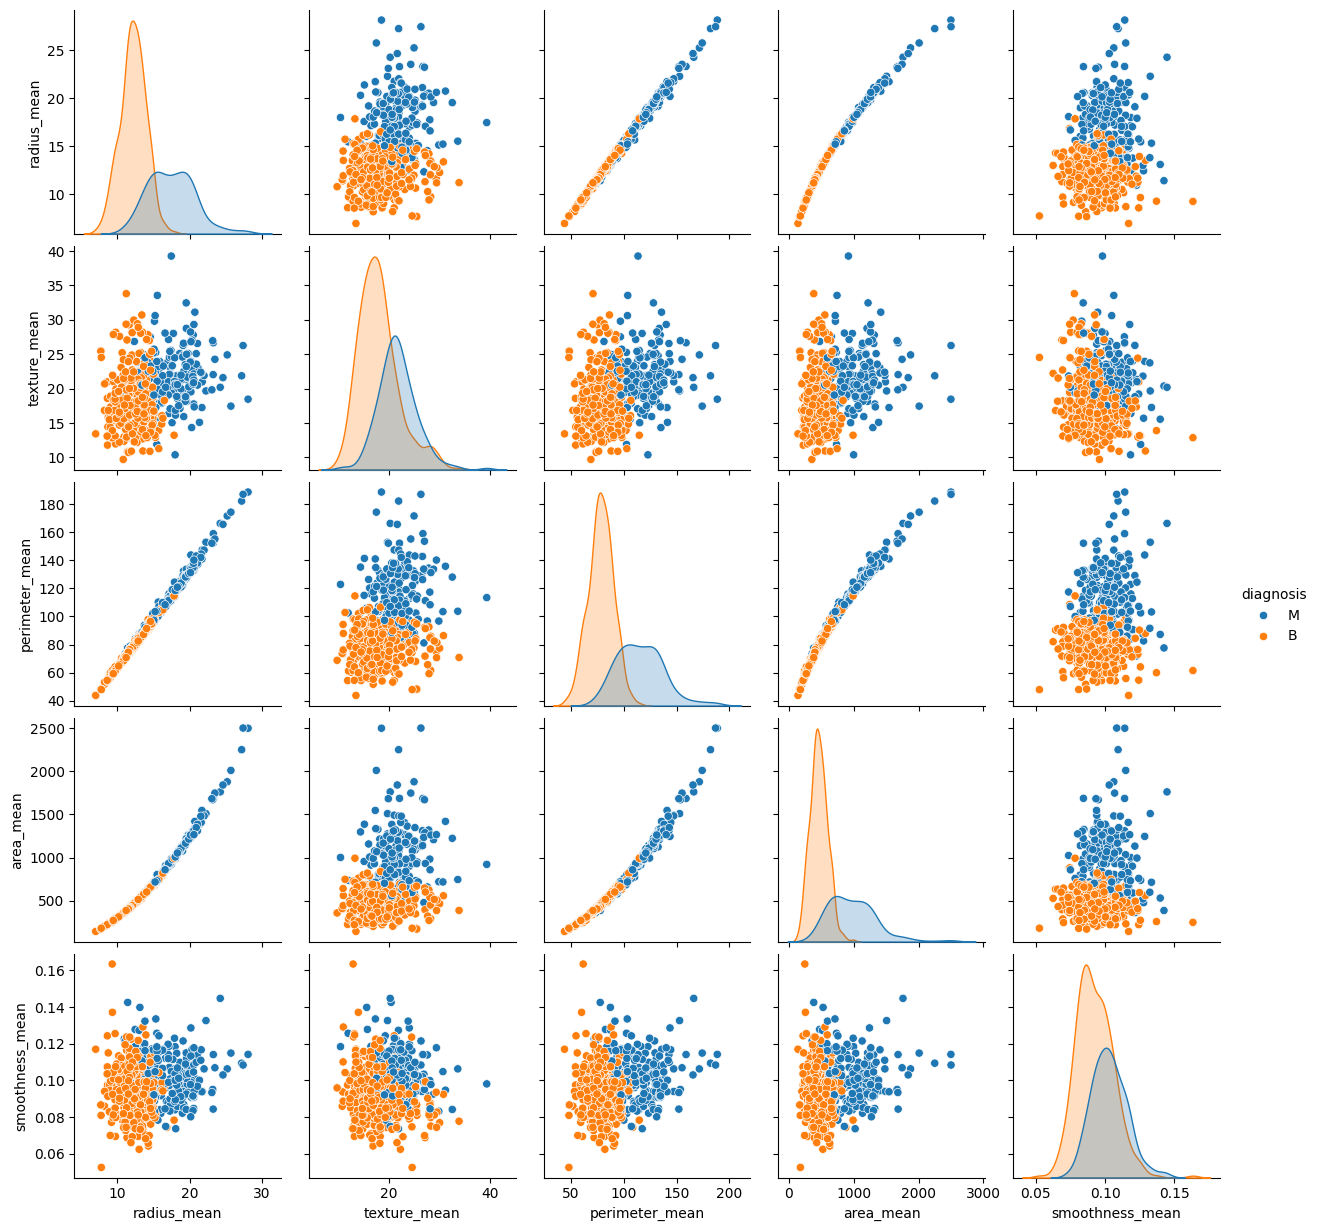

In [37]:
# Pairplot for selected features
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean']
sns.pairplot(df, vars=selected_features, hue='diagnosis')
plt.show()


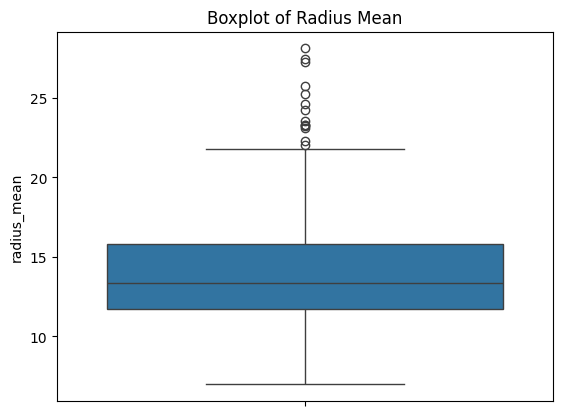

In [100]:
# Check for outliers
sns.boxplot(df['radius_mean'])
plt.title('Boxplot of Radius Mean')
plt.show()

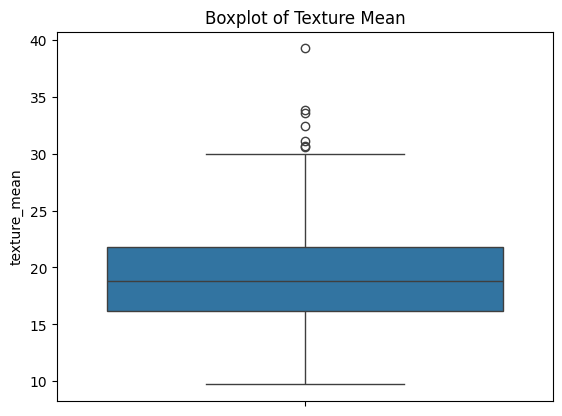

In [101]:
sns.boxplot(df['texture_mean'])
plt.title('Boxplot of Texture Mean')
plt.show()

Preprocessing : Process of preparing data for modelling


---



*   Encode categorical data : As 'diagnosis' column in present in string format, we convert to into binary form using LabelEncoder.
*   Scale numerical features : After scaling with StandardScaler, all features are transformed such that they now have a mean of 0 and a standard deviation of 1. This makes the data comparable, and algorithms that are sensitive to the scale of the features (e.g., k-NN, SVM) will perform better.
*   Splitting the data into training and testing sets







In [103]:
#Encoding the 'diagnosis' column

label_encoder=LabelEncoder()
df['diagnosis']=label_encoder.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [112]:
#Separate feature and target

x = df.loc[:, df.columns != 'diagnosis']
y = df['diagnosis']

x = x.values
y = y.values

#Check for NaN values
print("NaN values in X:", np.isnan(x).sum())
print("NaN values in Y:", np.isnan(y).sum())

NaN values in X: 0
NaN values in Y: 0


In [113]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [125]:
#Splitting the data into train and test dataset
x_train,x_test,y_train, y_test = train_test_split (x_scaled,y,test_size = 0.25, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (426, 30)
y_train shape: (426,)
x_test shape: (143, 30)
y_test shape: (143,)


Build the Model

In [169]:
#Logistic Regression
print("_________________________________________________________")
log = LogisticRegression(random_state=42)
log.fit(x_train, y_train)
y_pred_log = log.predict(x_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("_________________________________________________________")
#Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("_________________________________________________________")
#Naive-Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)
print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("_________________________________________________________")
#Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("_________________________________________________________")

_________________________________________________________
Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy: 0.9790209790209791
_________________________________________________________
Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Accuracy: 0.965034965034965
_________________________________________________________
Naive Bayes:
              precision    recall  f1-score   support

           

Accuracy of Each Model

<ipython-input-144-857150f3873a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette='plasma')


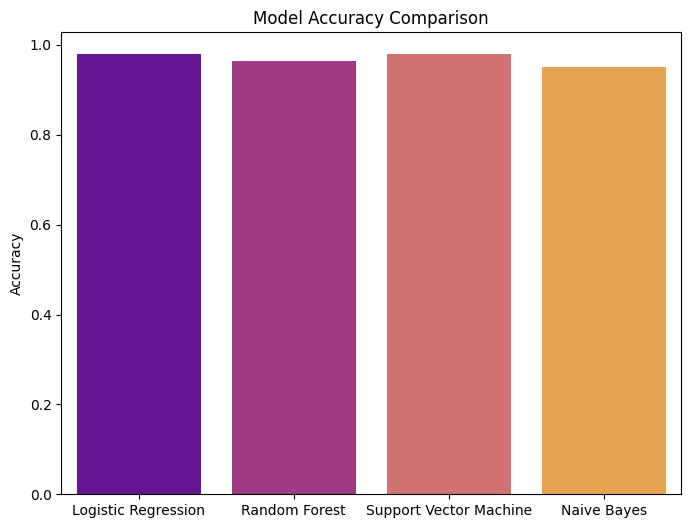

In [144]:

accuracy = {
    'Logistic Regression': accuracy_score(y_test, y_pred_log),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Support Vector Machine': accuracy_score(y_test, y_pred_svm),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb)
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette='plasma')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

Plotting Classification Report(Precision,Recall, F1)

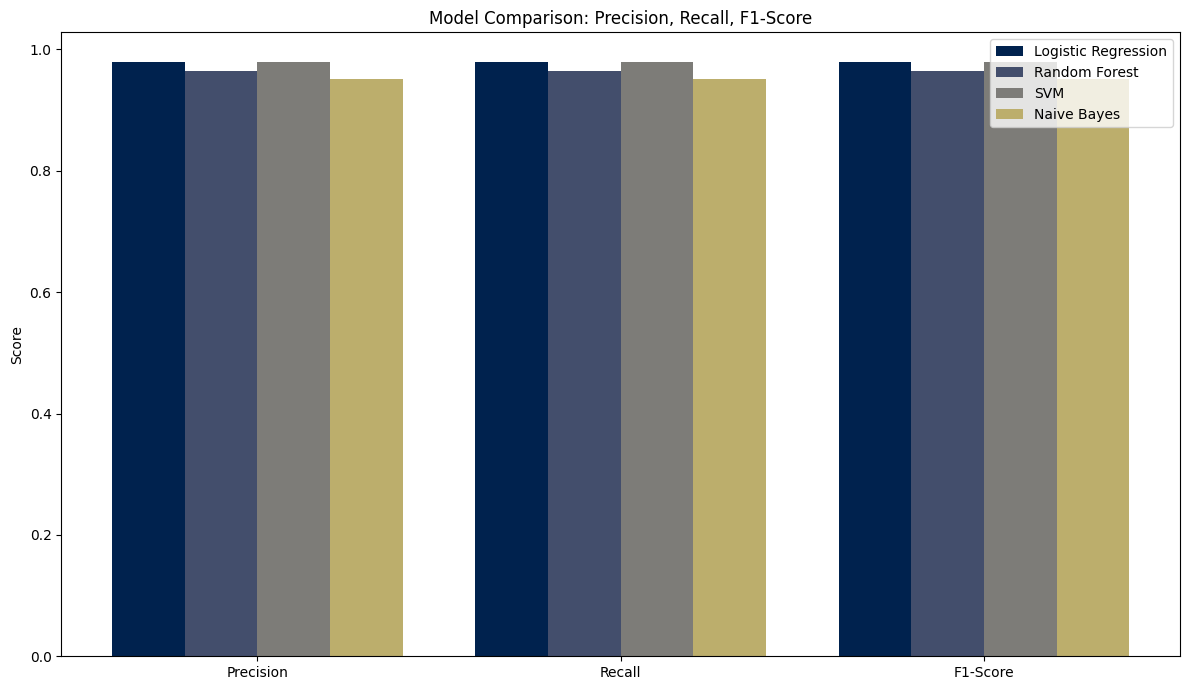

In [153]:
#Extract classification Metrics
report_log=classification_report(y_test, y_pred_log, output_dict=True)
report_rf=classification_report(y_test, y_pred_rf, output_dict=True)
report_svm=classification_report(y_test, y_pred_svm, output_dict=True)
report_nb=classification_report(y_test,y_pred_nb, output_dict=True)
import matplotlib.pyplot as plt
from matplotlib.cm import cividis

# Prepare data for plotting
metrics = ['precision', 'recall', 'f1-score']
log_values = [report_log['weighted avg'][metric] for metric in metrics]
rf_values = [report_rf['weighted avg'][metric] for metric in metrics]
svm_values = [report_svm['weighted avg'][metric] for metric in metrics]
nb_values = [report_nb['weighted avg'][metric] for metric in metrics]

# Cool color palette
colors = [cividis(i/4) for i in range(4)]

fig, ax = plt.subplots(figsize=(12, 7))
x_labels = ['Precision', 'Recall', 'F1-Score']
x = range(len(metrics))
width = 0.2

# Plotting each model with cool colors
ax.bar([i - 1.5 * width for i in x], log_values, width, label='Logistic Regression', color=colors[0])
ax.bar([i - 0.5 * width for i in x], rf_values, width, label='Random Forest', color=colors[1])
ax.bar([i + 0.5 * width for i in x], svm_values, width, label='SVM', color=colors[2])
ax.bar([i + 1.5 * width for i in x], nb_values, width, label='Naive Bayes', color=colors[3])

ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Precision, Recall, F1-Score')
ax.legend()

plt.tight_layout()
plt.show()


Confusion Matrix : To evaluate performance of various models Logistic Regression, Random Forest,SVM, Naive Bayes

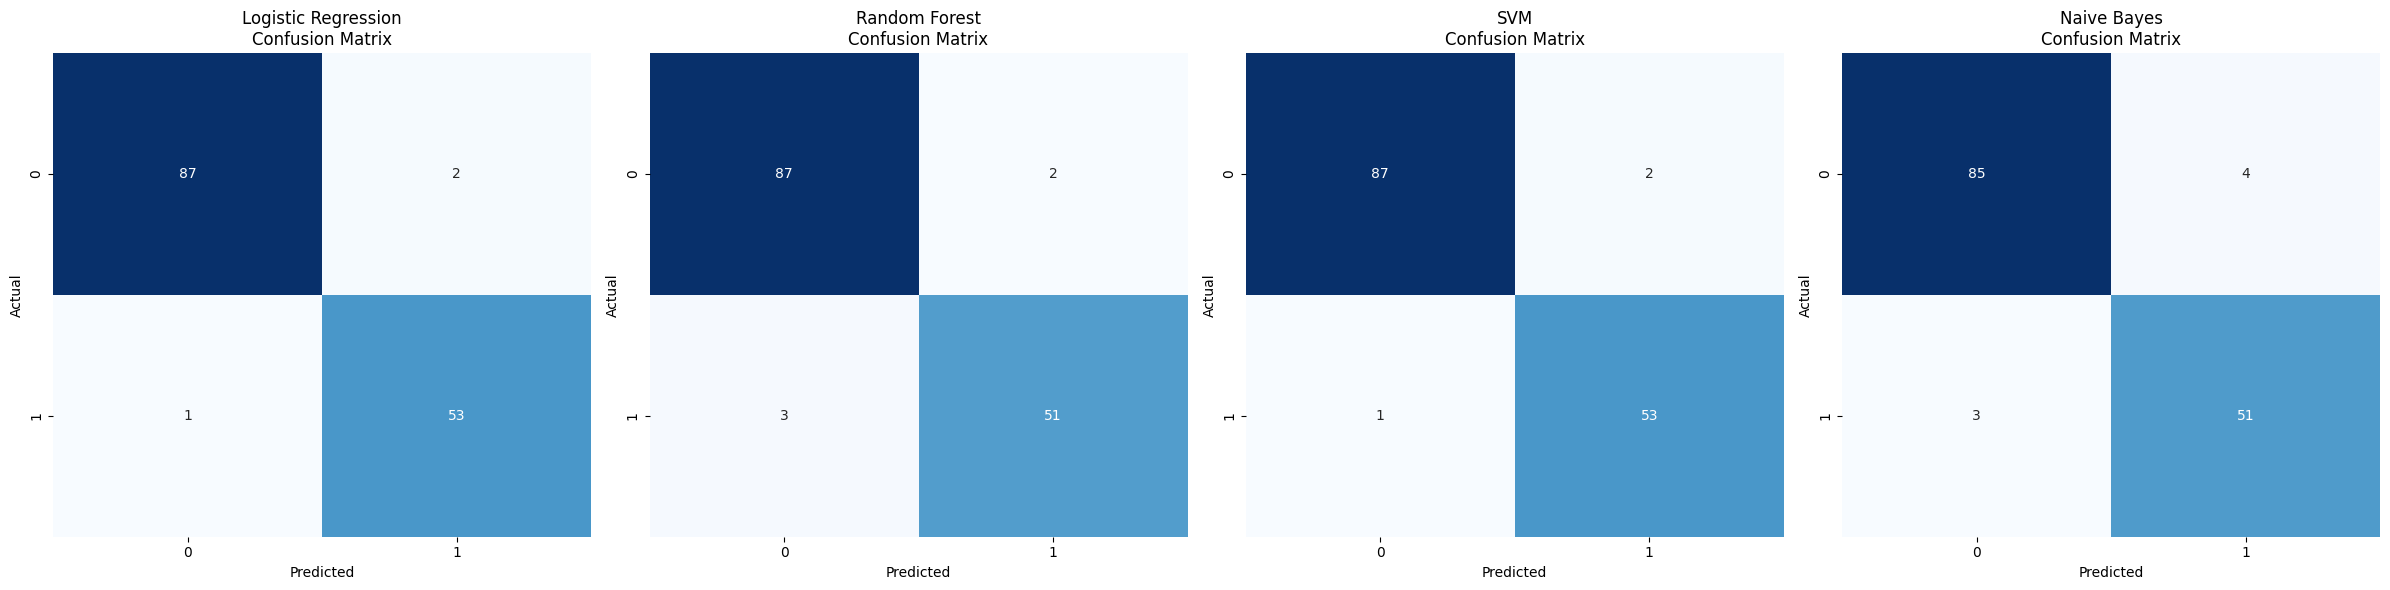

In [164]:

cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_nb=confusion_matrix(y_test, y_pred_nb)

# Plotting confusion matrix for each model
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Logistic Regression\nConfusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Random Forest\nConfusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[2])
axes[2].set_title('SVM\nConfusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[3])
axes[3].set_title('Naive Bayes\nConfusion Matrix')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('Actual')

plt.tight_layout()
plt.show()


Hyperparameter tuning is the process of finding the best configuration of hyperparameters to optimize a machine learning model's performance.
*   Implementation using GridSearchCV



In [184]:
from sklearn.model_selection import GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Relevant only for 'poly' kernel
}

grid_search_svm = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid_svm, cv=5, verbose=2, n_jobs=-1)
grid_search_svm.fit(x_train, y_train)

print("SVM - Best Parameters:", grid_search_svm.best_params_)
print("SVM - Best Score:", grid_search_svm.best_score_)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
SVM - Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
SVM - Best Score: 0.976497948016416


In [185]:

param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search_nb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=5, verbose=2, n_jobs=-1)
grid_search_nb.fit(x_train, y_train)

print("Naive Bayes - Best Parameters:", grid_search_nb.best_params_)
print("Naive Bayes - Best Score:", grid_search_nb.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Naive Bayes - Best Parameters: {'var_smoothing': 1e-09}
Naive Bayes - Best Score: 0.9296032831737346


In [216]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.962435020519836


# **Deploying**

After hyperparameter tuning, the best model is selected using the best_estimator_ attribute from tools like GridSearchCV. The model is then saved using libraries like joblib to avoid retraining.

# **Why Random Forest Over Others?**

**Logistic Regression**: While interpretable, it might not handle nonlinear relationships in the data as effectively as Random Forest.(Unable to fit the model, as whole dataset does not follow linear fashion)

**SVM**: Effective for high-dimensional datasets but can be computationally intensive and less interpretable than Random Forest.

**Naive Bayes**: A fast and simple algorithm but assumes feature independence, which might not hold true for breast cancer prediction datasets.


In [217]:
import joblib

# Save the best model
joblib.dump(grid_search.best_estimator_, 'breast_cancer_model.pkl')
loaded_model = joblib.load('breast_cancer_model.pkl')

# Access the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Access the best score
best_score = grid_search.best_score_
print("Best Cross-Validation Score:", best_score)


X_test = x_test
y_pred = loaded_model.predict(X_test)
print("Predictions:", y_pred)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Score: 0.962435020519836
Predictions: [0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0]


In [220]:
from sklearn.metrics import classification_report, roc_auc_score

print("_______________________________________________________________")
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
print("_______________________________________________________________")
print("SVM Report:\n", classification_report(y_test, y_pred_svm))
print("SVM ROC-AUC:", roc_auc_score(y_test, svm_model.decision_function(X_test)))
print("_______________________________________________________________")
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes ROC-AUC:", roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1]))
print("_______________________________________________________________")


_______________________________________________________________
Random Forest Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Random Forest ROC-AUC: 0.9962546816479401
_______________________________________________________________
SVM Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

SVM ROC-AUC: 0.9950062421972534
_______________________________________________________________
Naive Bayes Report:
               precision

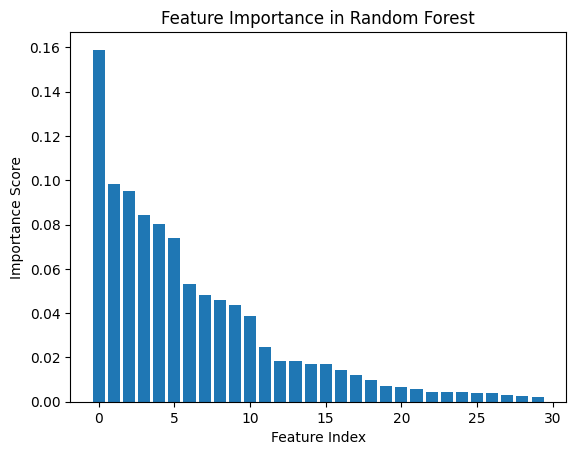

In [219]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = grid_search.best_estimator_.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.bar(range(x_train.shape[1]), feature_importances[sorted_indices])
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest")
plt.show()
